In [1]:
# #!/usr/bin/env python3

import matplotlib.pyplot as plt
import pandas as pd 
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
## ~~ READING DATA ~~ ##
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recoveries_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [3]:
## ~~ USEFUL VALUES FOR LATER ~~ ##
case_cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, case_cols[4]:case_cols[-1]]
recovery_cols = recoveries_df.keys()
recoveries = recoveries_df.loc[:, recovery_cols[4]:recovery_cols[-1]]
dates = confirmed.keys()

In [4]:
def get_country_info(country_name):
    country_cases = []
    country_recoveries = []  

    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())

    return country_cases, country_recoveries

In [5]:
def case_vs_recovery_plot(x, y1, y2, country):
    # window is set as 14 in in the beginning of the notebook 

    months = []

    for date in dates:
        month = re.findall(r"([0-9]{1,2}/1/20)", date)
        if month:
            months.append(month[0])
    
    plt.figure(figsize = (15, 8))
    plt.plot(x, y1, color="red", label="Confirmed Cases")
    plt.plot(x, y2, color="blue", label="Recoveries")
    plt.legend(fontsize = 20)
    plt.title('{} Confirmed Cases vs Recoveries'.format(country), size = 25)
    plt.xlabel('Date', size = 20)
    plt.ylabel('# of People', size = 20)
    plt.yticks(size = 10)
    plt.xticks(months, size = 10)

    plt.show()

In [6]:
def case_vs_recovery_visualization(country_name):
    country_cases = get_country_info(country_name)[0]
    country_recoveries = get_country_info(country_name)[1]

    case_vs_recovery_plot(dates, country_cases, country_recoveries, country_name)

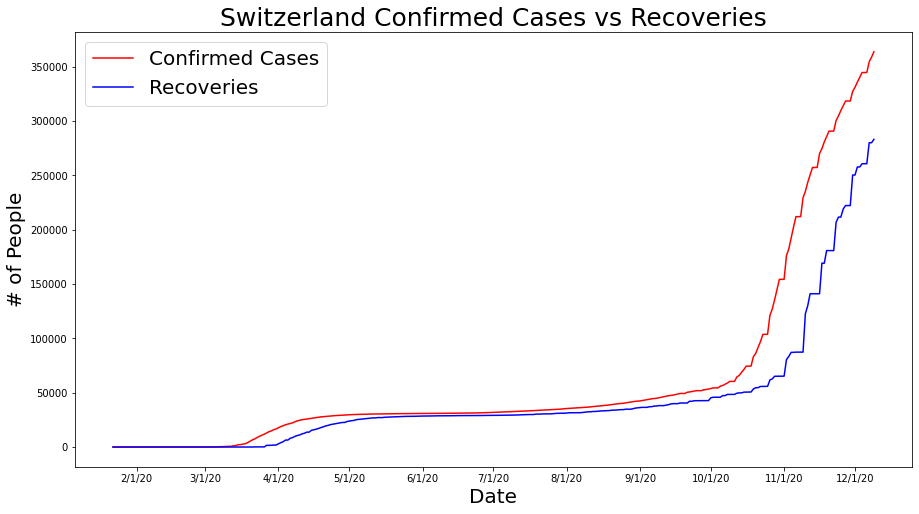

In [7]:
case_vs_recovery_visualization("Switzerland")